In [ ]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

# 100% Genauigkeit, das muss doch gut sein, oder?

## <a name="2nd_Part"></a> Leistungsmetriken für die Regression


Metriken sind wichtig, weil wir den maschinellen Lernalgorithmus während des Trainings ständig verändern. Wir "rühren den Haufen um, bis die Ergebnisse richtig aussehen".


Ein Modell ist eine vereinfachte Darstellung der Realität. Dazu müssen einige unnötige Details entfernt werden, damit sich bei der Interpretation der Daten auf die entscheidenderen Aspekte konzentriert werden kann. 
Diese Vereinfachung basiert auf Annahmen darüber, was in den Daten wichtig ist und was ignoriert werden kann. Annahmen, die bei einer Art von Problem funktionieren, funktionieren jedoch nicht bei einer anderen Art von Problem.
Das "No Free Lunch Theorem" besagt, dass es kein Modell geben kann, das für alle Arten von Problemen die beste Performanz erbringt. Daher ist es beim maschinellen Lernen üblich, verschiedene Modelle auszuprobieren und das Modell mit den besten Ergebnissen auszuwählen. Die Auswahl des Modells mit der "besten Performanz" klingt einfach, aber es zeigt sich, dass es viele verschiedene Interpretationen einer "guten Performanz" gibt.
Wenn jemand zu Ihnen sagt "Öttinger ist das beste Bier", sollte die erste Frage lauten: Auf welcher Grundlage wird diese Aussage getroffen? Ist der Geschmack, das Styling der Flasche oder die Schaumkonsistenz relevant? Ähnlich müssen die Metriken, die für Machine-Learning-Modelle verwendet werden, spezifisch für das gegebene Problem, den Datensatz und die Strategie ausgewählt werden. Daher ist es wichtig, den Kontext zu verstehen, bevor man eine Metrik auswählt. In diesem Kapitel werden wir uns auf die Metriken konzentrieren, die für Klassifikations- und Regressionsprobleme verwendet werden. 



### Regressionsmetriken
Um die Regressionsmetriken zu verstehen, soll der "Boston House Price" Datensatz als Beispiel verwendet werden. Hierbei handelt es sich um ein Regressionsproblem, bei dem alle Eingabevariablen ebenfalls numerisch sind. Die wichtigsten Metriken in der Regression sind __Verlustfunktionen__.
Wenn eine Funktion an Datenpunkte angepasst wird (engl. fitting), wird die Differenz zwischen den tatsächlichen Datenpunkten und der Ausgabe der Vorhersagefunktion für diese Punkte verwendet und weiterverarbeitet.

Zum Beispiel wird in einer 2-D-Ebene der vertikale Abstand zwischen jedem tatsächlichen Datenpunkt $(x_n|y_n)$ und der Ausgabe der Modellfunktion für diese Punkte $m(x_n)$ durch Subtraktion der y-Werte der Datenpunkte von den vorhergesagten y-Werten der Modellfunktion berechnet (3).

\begin{align}
d_n & = m(x_n)-y_n \;\;\;\;\;\;\;\;\;\;\; (3)
\end{align}
![loss_explanation.png](images/loss_explanation.png)


Je mehr die Modellfunktion von den gegebenen Datenpunkten abweicht, desto höher fällt der Verlust aus. Die Idee dabei ist, dass ein hoher Verlust auf eine schlechte Modellfunktion hindeutet. Während ein niedriger Verlust auf eine gute Modellfunktion schließen lässt. Allgemein versucht ein Trainingsalgorithmus, die Modellfunktion so zu verändern, dass der Verlust minimiert wird.
In den meisten Fällen ist dieser Ansatz sinnvoll. Wie man aber im Fall von Overfitting sehen kann, ist das Modell mit dem niedrigsten Verlust möglicherweise nicht immer das beste Modell, um neue Daten vorherzusagen.

#### Mittlerer Absoluter Fehler (MAE)

Der mittlere absolute Fehler (Mean Absolute Error, MAE) ist eine sehr einfache Verlustfunktion. Sie stellt die Abweichung der vorhergesagten Werten von den erwarteten Werten dar und gibt somit eine Vorstellung davon, wie falsch die Vorhersagen waren. Der MAE wird als Durchschnitt der absoluten Fehlerwerte berechnet, wobei absolut bedeutet, dass die Fehler stehts positiv sind und diese somit einfach addiert werden können.

Nicht verwechselt werden sollte der MAE mit der durchschnittlichen absoluten Abweichung


Der MAE kann berechnet werden mit:  

$ \large MAE = \frac{\sum_{i=0}^{n-1}\left | e_{i}\right |}{n} = \frac{\sum_{i=0}^{n-1}\left | y_{i} - m(x_{i})\right |}{n} = \frac{\sum_{i=o}^{n-1}\left | ground\_truth_{i} - predicted_{i} \right |}{total predictions} $


![mean_absolute_error.png](images/mean_absolute_error.png)


Oder mit Worten ausgedrückt, er ist die Summe der Abstände zwischen dem vorhergesagten Wert und dem wahren Wert, geteilt durch die Anzahl der Werte.

Der mittlere absolute Fehler verwendet die gleiche Skala wie die zu messenden Daten. Er wird als skalenabhängiges Genauigkeitsmaß bezeichnet und kann daher nicht zum Vergleich zwischen Messreihen mit unterschiedlichen Skalen verwendet werden.
Ein Wert von 0 bedeutet, dass kein Fehler vorliegt, also eine perfekte Vorhersage getroffen wurde.
Der nächstehende Codeblock stellt die MAE auf interaktive Weise dar.
(Siehe auch: https://en.wikipedia.org/wiki/Mean_absolute_error)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
from ipywidgets import interactive

# Example of Calculating Mean Absolute Error

# Calculate mean absolute error
def mae_metric(actual: list, predicted: list):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

# Test RMSE
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]

print("MAE = ", mae_metric(actual, predicted))

#Now we make a plot of the values
Eje_X = [0, 1, 2, 3, 4]

def f2(pre0:float=0.11, pre1:float=0.19, pre2:float=0.29, pre3:float=0.41, pre4:float=0.5):
    predicted = [pre0, pre1, pre2, pre3, pre4]
    plt.figure(num=None, figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
    actual_plt = plt.scatter(Eje_X, actual)
    predicted_plt = plt.scatter(Eje_X, predicted)
   
    #The following section draws the line between actual and predicted values.
    for x in range(len(actual)):
        plt.plot([x, x], [actual[x], predicted[x]], color = 'g')
    
    plt.ylim(0, 0.6)
    
    plt.legend((actual_plt, predicted_plt), ('Actual', 'Predicted'), loc='lower right')
    plt.show()
   
    
interactive_plot = interactive(f2, 
                                pre0=(0.0, 0.6, 0.01), 
                                pre1=(0.0, 0.6, 0.01), 
                                pre2=(0.0, 0.6, 0.01), 
                                pre3=(0.0, 0.6, 0.01), 
                                pre4=(0.0, 0.6, 0.01))
output = interactive_plot.children[-1]
interactive_plot

MAE =  0.007999999999999993


interactive(children=(FloatSlider(value=0.11, description='pre0', max=0.6, step=0.01), FloatSlider(value=0.19,…

Die grünen Linien stellen den Abstand zwischen dem vorhergesagten und dem tatsächlichen Wert dar. Aufsummiert und durch n geteilt, ergeben diese Abstände den MAE.

<div class="alert alert-block alert-success">
<b>Aufgabe 2.2.1:</b> Erstellen Sie ein lineares Regressionsmodell, um den Wert der Häuser zu schätzen. Berechnen Sie anschließend den MAE jedes trainierten Modells. Berechnen Sie zudem den Mittelwert sowie die Standardabweichung aller Modelle. Beachten Sie die folgenden Anweisungen:

* _Datensatz:_ housings.csv im Dataset-Ordner https://www.kaggle.com/c/boston-housing
* _Label:_ housings.csv im Daten-Ordner
* _Resampling-Methode:_ k-fold, `n_splits` = 10, `random_state` = 7 und `shuffle` = True. (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
* _Modell:_ Lineare Regression
* _Metrik:_ MAE, Hinweis: Verwenden Sie die Methode: cross_val_score (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) und den Scoring-Parameter. Eine Liste aller möglichen Scoring-Parameter finden Sie hier: https://scikit-learn.org/stable/modules/model_evaluation.html

</div>

In [6]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#STUDENT CODE HERE
filename="data/housing.csv"
names=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","price"]
#STUDENT CODE until HERE
dataframe = read_csv(filename, delim_whitespace=True,names=names)
X=dataframe.loc[0:13].values
Y=dataframe.loc[13].values
#STUDENT CODE HERE
kf=KFold(n_splits=10,random_state=7, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, y_test = Y[train_index], Y[test_index]
model=LinearRegression()
kfold=kf.split(X)
scoring="neg_mean_absolute_error"
#STUDENT CODE until HERE
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("MAE: %.3f (%.3f)" % (-results.mean(), results.std()))


MAE: 408.955 (299.693)


C:\Users\anderlfr\AppData\Local\Temp\ipykernel_6056\933436781.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filename, delim_whitespace=True,names=names)


<div class="alert alert-block alert-success">
<b>Frage 2.2.2:</b> Wie groß ist der MAE und die Standardabweichung des MAE.
</div>

<div class="alert block alert-success">

<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 2.2.3:</b> Entsprechend dieser MAE-Metrik: Sind die Vorhersagen gut oder schlecht? Wie kann man das allgemein erkennen?
</div>

<div class="alert alert block alert-success">

<b>Ihre Antwort:</b>Die Vorhersagen sind schlecht, da die Varianz sehr groß ist und der Fehler ebenso.</div>


#### Mittlerer Quadratischer Fehler (MSE)

Der mittlere quadratische Fehler (MSE) und der mittlere quadratische Wurzelfehler (RMSE) sind zwei Metriken, die in enger Beziehung zueinander stehen.

Der Ausdruck für MSE ist:

$ MSE = \frac{\sum_{i=0}^{n-1} \left ( predicted_{i} - ground\_truth_{i} \right )^{2} }{allpredictions} $

![mean_squared_error.png](images/mean_squared_error.png)

Der mittlere quadratische Fehler (oder MSE) ist dem mittleren absoluten Fehler ähnlich, da er eine grobe Vorstellung von der Größe des Fehlers gibt.  

Bei der Berechnung des MSE führt die Quadrierung jeden Fehlers dazu, dass die Werte ebenfalls positiv sind. Der RMSE ist einfach die Quadratwurzel des MSE.



<div class="alert alert-block alert-success">
<b>Aufgabe 2.2.4:</b> In der nachfolgenden Zelle sind einige Daten mit dem Namen <code>data</code> und die Ausgabe von vier Modellen <code>data_model1</code>, <code>data_model2</code>,  <code>data_model3</code> and <code>data_model4</code> gegeben. Berechnen Sie den MSE für alle Modellausgaben und speichern Sie ihn in der Variablen <code>mse_model1</code> für Modell 1, <code>mse_model2</code> für Modell 2, <code>mse_model3</code> für Modell 3 und <code>mse_model4</code> für Modell 4.
</div>

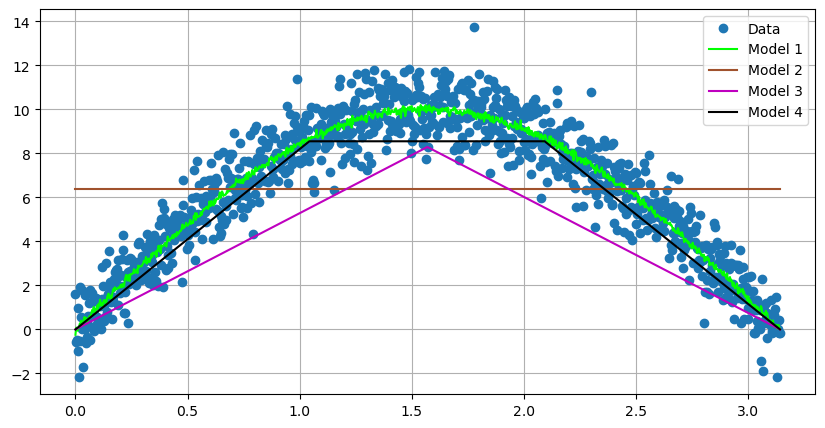

MSE of model1:  0.9716
MSE of model2: 10.4333
MSE of model3:  6.8371
MSE of model4:  1.6217


In [9]:
# generate some data
import math
import matplotlib.pyplot as plt
import numpy as np

rs = np.random.RandomState(1)
num_samples = 1001
upper_boundary = math.pi
lower_boundary = 0.
x_values = np.linspace(0, upper_boundary, num_samples)
data = [math.sin(x)*10 for x in x_values] + rs.normal(0, 1, num_samples)
data_model1 = [sum(x)*10 for x in zip([math.sin(x) for x in x_values], rs.normal(0, 10**(-2), num_samples))]
data_model2 = [np.mean(data) for _ in x_values]
median_noise = data[np.where(x_values == np.median(x_values))]
data_model3 = np.concatenate((np.linspace(0, median_noise, int(num_samples/2)), np.linspace(median_noise, 0., int(num_samples/2)+1))).flatten()

val1 = data[int(len(data)/3)]
val2 = data[int(len(data)/3)]
data_model4 = np.concatenate((
    np.linspace(0, val1, int(len(data)/3)),
    np.linspace(val1, val2, int(len(data)/3)),
    np.linspace(val2, 0., len(data)-int(len(data)/3) - int(len(data)/3))
))

plt.figure(figsize=(10,5))
plt.plot(x_values, data, marker='o', linestyle='None', label='Data', c='C0')
plt.plot(x_values, data_model1, label='Model 1', c='lime')
plt.plot(x_values, data_model2, label='Model 2', c='sienna')
plt.plot(x_values, data_model3, label='Model 3', c='m')
plt.plot(x_values, data_model4, label='Model 4', c='k')
plt.legend()
plt.grid()
plt.show()

#STUDENT CODE HERE

mse_model1=sum((data-data_model1)**2)/len(data)
mse_model2=sum((data-data_model2)**2)/len(data)
mse_model3=sum((data-data_model3)**2)/len(data)
mse_model4=sum((data-data_model4)**2)/len(data)

#STUDENT CODE until HERE

print('MSE of model1: {:7.4f}'.format(mse_model1))
print('MSE of model2: {:7.4f}'.format(mse_model2))
print('MSE of model3: {:7.4f}'.format(mse_model3))
print('MSE of model4: {:7.4f}'.format(mse_model4))

#### MAE vs. MSE und RMSE

Sowohl MAE als auch RMSE drücken den durchschnittlichen Modellvorhersagefehler in Einheiten der betrachteten Variable aus. Beide Metriken können von 0 bis ∞ reichen und sind unabhängig von der Fehlerrichtung. Sie sind negativ orientierte Scores, was bedeutet, dass niedrigere Werte besser sind.

Der RMSE gibt großen Fehlern ein relativ hohes Gewicht. Das bedeutet, dass der RMSE eher nützlich sein sollte, wenn große Fehler besonders unerwünscht sind.

Lassen Sie uns die obige Aussage anhand von zwei Beispielen verstehen:

<font color='green'>__Fall 1:__</font> Tatsächliche Werte = [2,4,6,8] , Vorhersage = [3,5,7,9]

<font color='red'>__Fall 2:__</font> Tatsächliche Werte = [2,4,6,8] , Vorhersage = [3,5,7,11]

Bezüglich <font color='green'>__Fall 1:__</font> __MAE__ = 1,0; __MSE__ = 1,0

Zu <font color='red'>__Fall 2:__</font> __MAE__ = 1,5; __MSE__ = 3,0

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Auch wenn die Modelle komplexer werden und eine höhere Abweichung aufweisen, ist MSE immer noch die Standardmetrik vieler Modelle. Dies gilt insbesondere für neuronale Netze, die Sie später kennenlernen werden.  Dadurch, dass der MSE leicht differenziert werden kann, können mathematische Operationen einfacher duchrgeführt werden.
</div>


### Overfitting und Underfitting


__Overfitting und Underfitting beim maschinellen Lernen__

Wir sollten stets bedenken, dass wir ein maschinelles Lernmodell entwerfen und keinen "klassischen" Algorithmus. Im Allgemeinen können wir sagen, dass ein gut entworfenes Modell in der Lage sein wird, alle möglichen Arten von Dateneingaben der Domäne zu generalisieren. Lasst uns ein Beispiel betrachten: Ein mit Hunden trainierter Bildklassifikator, der gut genug generalisiert, wird in der Lage sein, einen Husky als Hund zu klassifizieren, obwohl keine Huskys in den Trainingsdaten vorhanden sind. Das gleiche Prinzip gilt für Vorhersagen. Ein gut generalisierendes Modell wird in der Lage sein, gute Vorhersagen auf Basis von Daten zu machen, die es noch nie gesehen hat, solange die Daten nicht völlig anders strukturiert oder beschaffen sind.

Für uns ist es wichtig zu wissen, ob unser Modell gut generalisiert. Man könnte sagen, dass es wichtig ist, ein passendes Modell für die Problemdomäne zu erstellen. Dies ist jedoch von vielen Faktoren abhängig. Beim maschinellen Lernen beschreiben die Begriffe "Overfitting" und "Underfitting" zwei Probleme, die mit der Fähigkeit des Modells zur Generalisierung zusammenhängen.

__Underfitting__:
Ein statistisches Modell oder ein Algorithmus des maschinellen Lernens wird Underfitting zugeschrieben, wenn es den zugrunde liegenden Trend der Daten nicht erfassen kann. Underfitting zerstört die Genauigkeit unseres maschinellen Lernmodells. Sein Auftreten bedeutet, dass das Modell oder der Algorithmus sich nicht gut genug an die Daten anpasst. Wenn das Modell underfittet, ist es nicht komplex genug, um die Eigenschaften der Daten zu erfassen (z. B. Verwendung eines linearen Modells auf nicht lineare Daten). Wenn Ihr Modell Underfitting aufweist, sollten Sie die Auswahl Ihrer ML-Methode überdenken oder versuchen, die Hyperparameter anzupassen. Oft kann es hilfreich sein, die Datenmenge zu reduzieren und eine Überanpassung anzustreben, um herauszufinden, ob das gewählte Modell überhaupt in der Lage ist, die vorhandenen Daten wiederzugeben.


__Overfitting__:
Ein statistisches Modell ist overfittet, wenn es die Trainingsdaten gut repräsentiert, aber bei neuen, nie gesehene Daten nicht zum Generalisieren in der Lage ist. Ein typisches Merkmal überangepasster Modelle ist z. B., dass sie sogar Artefakte der Daten, wie deren spezifisches Rauschmuster, erlernen. Daher sind überangepasste Modelle im Allgemeinen sehr komplex und hochdimensional. In der Regel haben sie eine hervorragende Performanz, wenn ihnen bekannte Daten gezeigt werden, und fast keine Performanz bei neuen Daten. Bei der Regression kann Overfitting durch die Wahl der richtigen Modellparameter vermieden werden. Ein Beispiel: Wählen Sie ein lineares Regressionsmodell (nicht ein nicht-lineares), wenn Sie ein lineares Modell erwarten.

<!--- 
Link: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
-->

Ein gut funktionierendes Modell sollte weder unter einer Unteranpassung noch unter einer Überanpassung leiden, sondern sein Verhalten sollte zwischen diesen beiden liegen. Dies wird manchmal als das Goldilocks-Prinzip des maschinellen Lernens bezeichnet.
Ein einfaches Beispiel ist die Umlaufbahn der Erde. Sie ist nicht zu weit von der Sonne entfernt, sodass die Temperaturen nicht zu kalt für flüssiges Wasser auf der Oberfläche sind. Wäre sie zu nah an der Sonne, wäre es zu heiß für flüssiges Wasser. Letztlich wissen wir, dass wir weder zu nah noch zu weit weg sind; daher liegt die Position des Planeten Erde in der Goldilock-Zone.

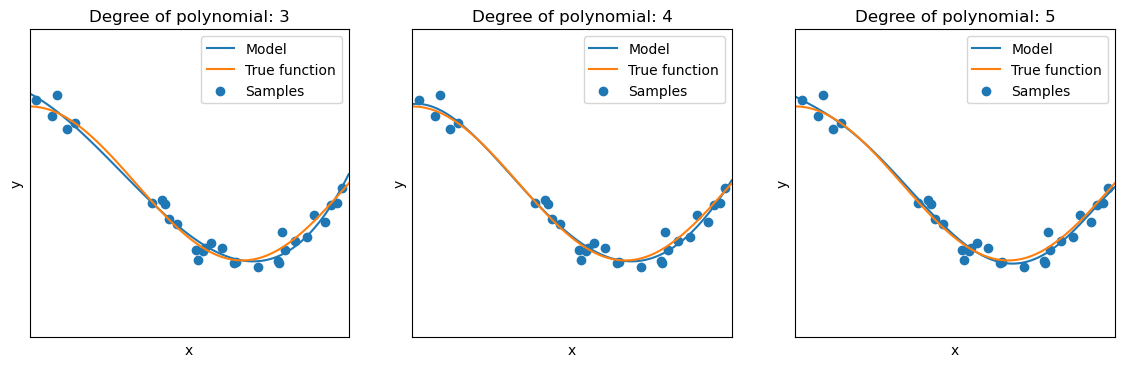

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


np.random.seed(0)

n_samples = 30

degrees = [3, 4, 5] #Try other polynomial-degrees!

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree of polynomial: %s" % degrees[i])
plt.show()

_Wenn Sie keine Bilder direkt über diesem Text sehen, führen Sie die Zelle erneut aus. Probieren Sie dabei auch gerne verschiedene Polynom-Grade aus._
<div class="alert alert-block alert-success">
<b>Frage 2.2.5:</b> Welcher Modellgrad repräsentiert Overfitting, welcher Underfitting und welcher Modellgrad passt genau? 
</div>

<div class="alert block alert-success">
<b>Ihre Antwort:</b>Da die Daten nicht linear sind, tritt Unterfitting auf, wenn der Polynomgrad 1 ist. Overfitting tritt bei Polynomgraden viel größer 4 auf, da dies der exakte Polynomgrad ist</div>
